Install Required Libraries


In [29]:
!pip install gdal
!pip install numpy>1.0.0 wheel setuptools>=67
!pip install gdal[numpy]=="$(gdal-config --version).*"
from osgeo import gdal_array
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
!pip install rasterio
import rasterio as rio
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

Access Data Files


In [61]:

remote = rio.open('/content/hexyf.tif')

remote_array = remote.read()

yona = rio.open('/content/OUTPUT.tif')

yona_array = yona.read()


In [95]:
print(yona_array.shape)

(1, 660, 590)


In [62]:
remote_array.shape

(3, 220, 197)

In [63]:
print(remote_array.shape)
print(yona_array.shape)

(3, 220, 197)
(1, 660, 590)


In [51]:
print(remote_array)

[[[191 192 191 ... 191 191 190]
  [191 192 191 ... 191 191 191]
  [193 193 191 ... 192 191 191]
  ...
  [194 193 191 ... 190 190 190]
  [194 194 192 ... 191 190 190]
  [194 193 191 ... 190 191 193]]

 [[180 180 179 ... 179 180 179]
  [180 180 180 ... 180 181 180]
  [181 181 180 ... 181 180 179]
  ...
  [182 182 180 ... 180 179 179]
  [183 183 180 ... 180 178 177]
  [182 181 179 ... 179 179 182]]

 [[172 173 172 ... 173 173 172]
  [173 174 172 ... 173 174 173]
  [174 174 173 ... 173 173 172]
  ...
  [175 174 173 ... 172 172 172]
  [176 175 174 ... 173 171 171]
  [176 174 173 ... 172 171 175]]]


In [93]:

nRows = remote_array.shape[1]

nCols = remote_array.shape[2]

Bands = remote_array.shape[0]


In [94]:
print(nRows, nCols, Bands)

220 197 3


Visualization and Observation of the data

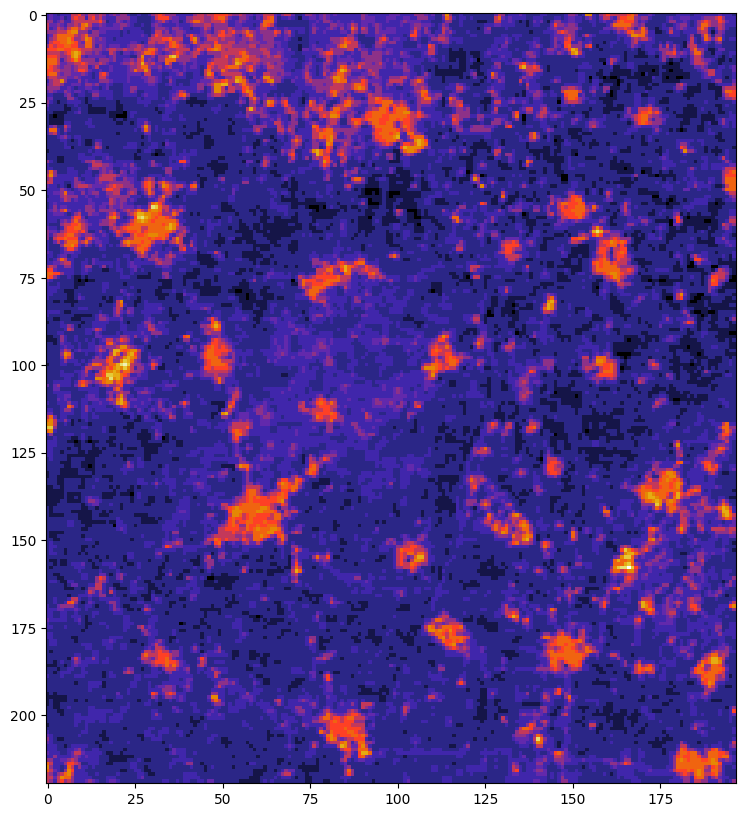

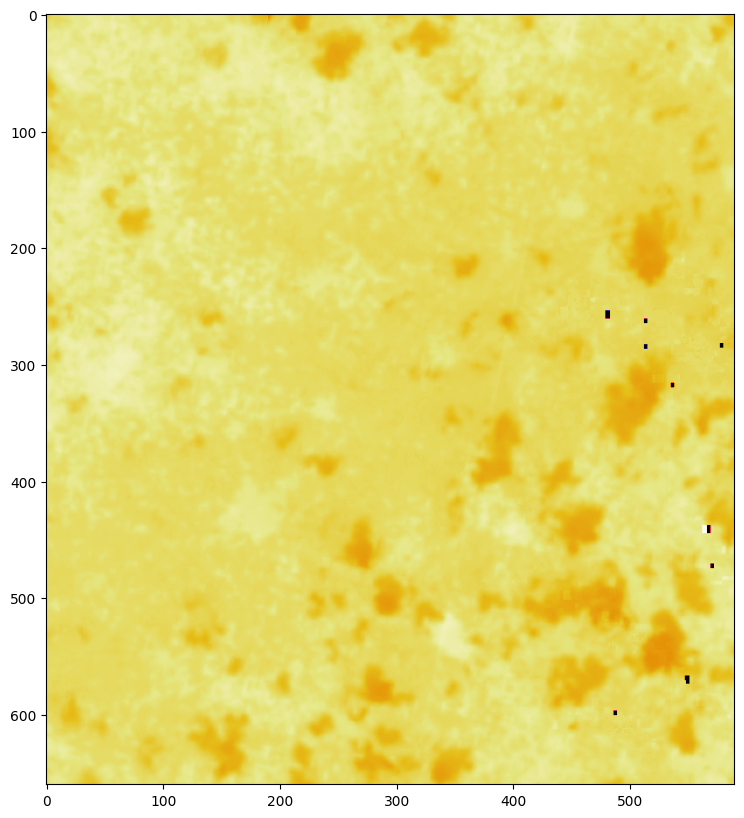

In [65]:

plt.figure(figsize=(10, 10))

# Display the first band of the 'remote_array' using the 'CMRmap' colormap
# 'remote_array[0, :, :]': Access the first band of the array
# 'cmap='CMRmap'': Apply the 'CMRmap' colormap for visualization
plt.imshow(remote_array[0, :, :], cmap='CMRmap')

plt.show()

plt.figure(figsize=(10, 10))

# Display the first band of the 'yona_array' using the 'CMRmap' colormap
# 'yona_array[0, :, :]': Access the first band of the array
# 'cmap='CMRmap'': Apply the 'CMRmap' colormap for visualization
plt.imshow(yona_array[0, :, :], cmap='CMRmap')

plt.show()


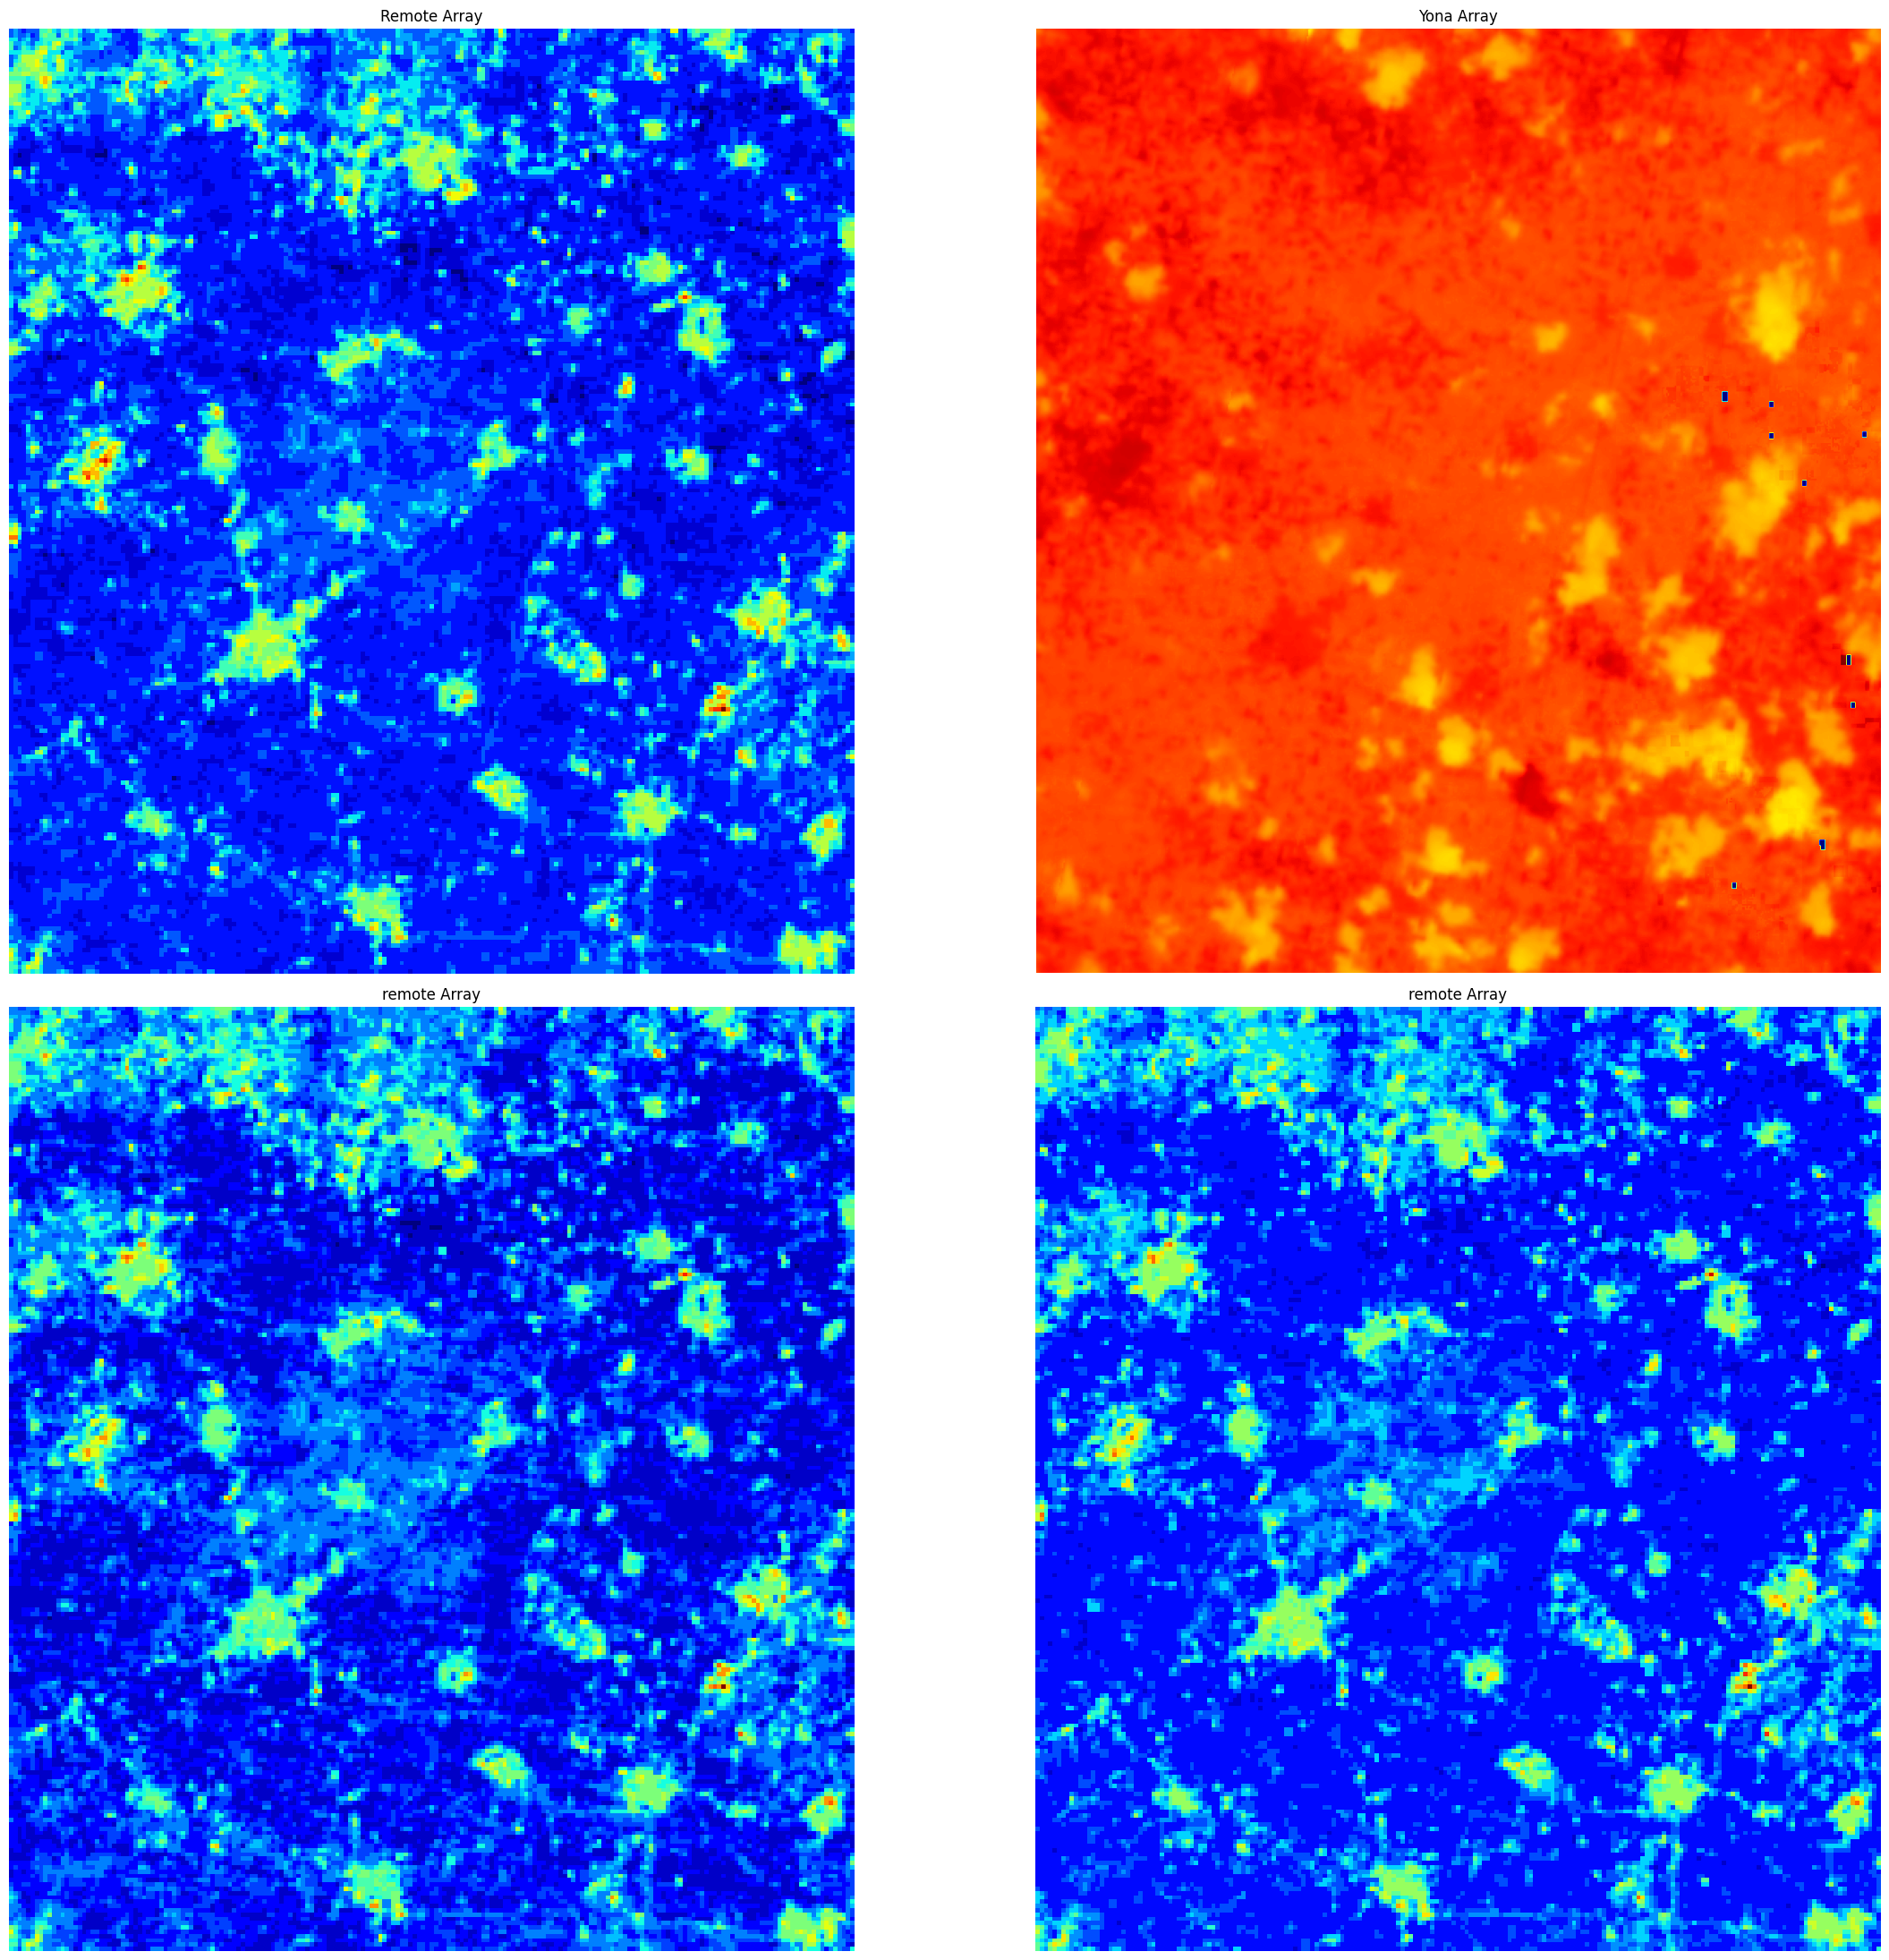

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(25, 22))

axs[0, 0].imshow(remote_array[0, :, :], cmap='jet')
axs[0, 0].set_title("Remote Array")
axs[0, 0].axis('off')


axs[0, 1].imshow(yona_array[0, :, :], cmap='jet')
axs[0, 1].set_title("Yona Array")
axs[0, 1].axis('off')


axs[1, 0].imshow(remote_array[1, :, :], cmap='jet')
axs[1, 0].set_title("remote Array")
axs[1, 0].axis('off')

axs[1, 1].imshow(remote_array[2, :, :], cmap='jet')
axs[1, 1].set_title("remote Array")
axs[1, 1].axis('off')


plt.tight_layout()


plt.show()

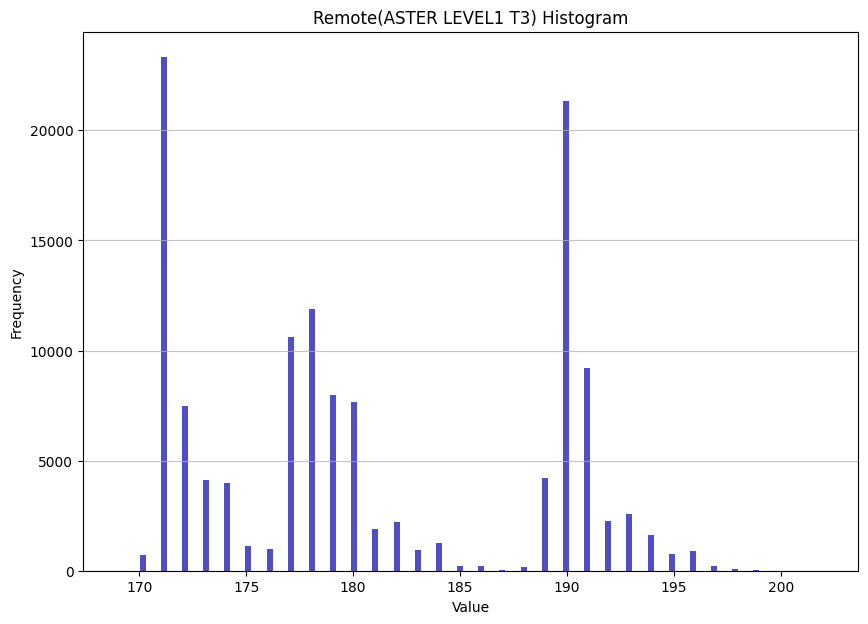

In [113]:
# Create a new figure with a size of 10x7 inches for plotting
plt.figure(figsize=(10, 7))

# Add a grid to the plot, affecting only the y-axis, with an alpha (transparency) of 0.75
plt.grid(axis='y', alpha=0.75)

# Set the label for the x-axis
plt.xlabel('Value')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Remote(ASTER LEVEL1 ) Histogram')

# Plot a histogram of the flattened 'remote_array' data
# 'x=remote_array.flatten()': Flatten the array to 1D before plotting
# 'bins=100': Number of bins in the histogram
# 'color='#0504aa'': Color of the bars in the histogram
# 'alpha=0.7': Transparency of the bars
# 'rwidth=0.85': Relative width of the bars as a fraction of the bin width
n, bins, patches = plt.hist(x=remote_array.flatten(), bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

# Display the plot
plt.show()


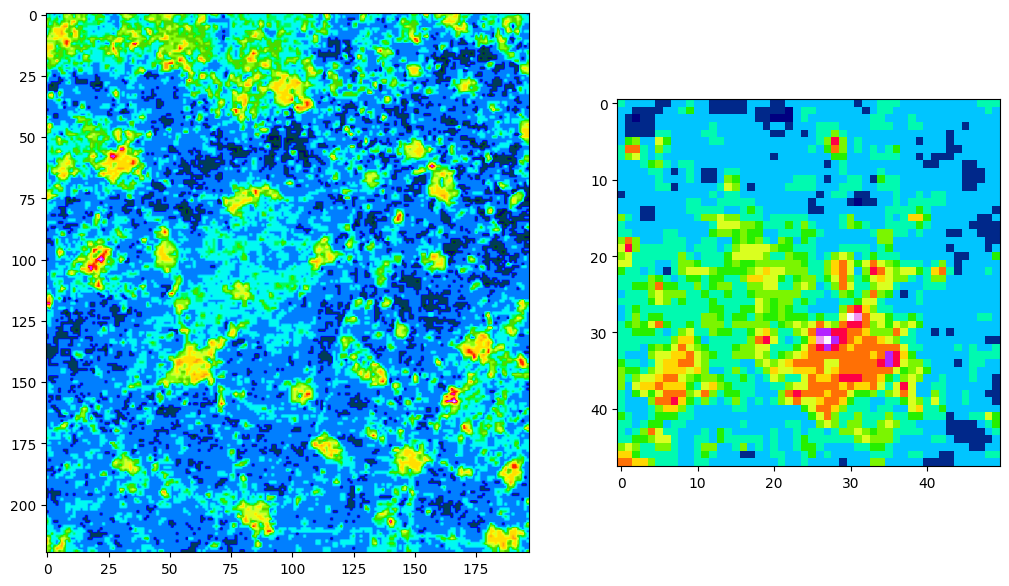

In [60]:
# Create a new figure with a size of 13x7 inches
fig = plt.figure(figsize=(13, 7))

# Create a GridSpec with 1 row and 5 columns
# This allows for flexible subplot arrangement
gs = fig.add_gridspec(1, 5)

# Add a subplot that spans the first three columns of the GridSpec
# Display the full image of the first band of 'remote_array' with 'gist_ncar' colormap
fig.add_subplot(gs[0, :3]), plt.imshow(remote_array[0, 0:, 0:], cmap='gist_ncar')

# Add a subplot that spans the last two columns of the GridSpec
# Display a cropped region of the first band of 'remote_array' with 'gist_ncar' colormap
fig.add_subplot(gs[0, -2:]), plt.imshow(remote_array[0, 27:75, 0:50], cmap='gist_ncar')

# Render and display the plot
plt.show()


Variational perspective for different features Identification

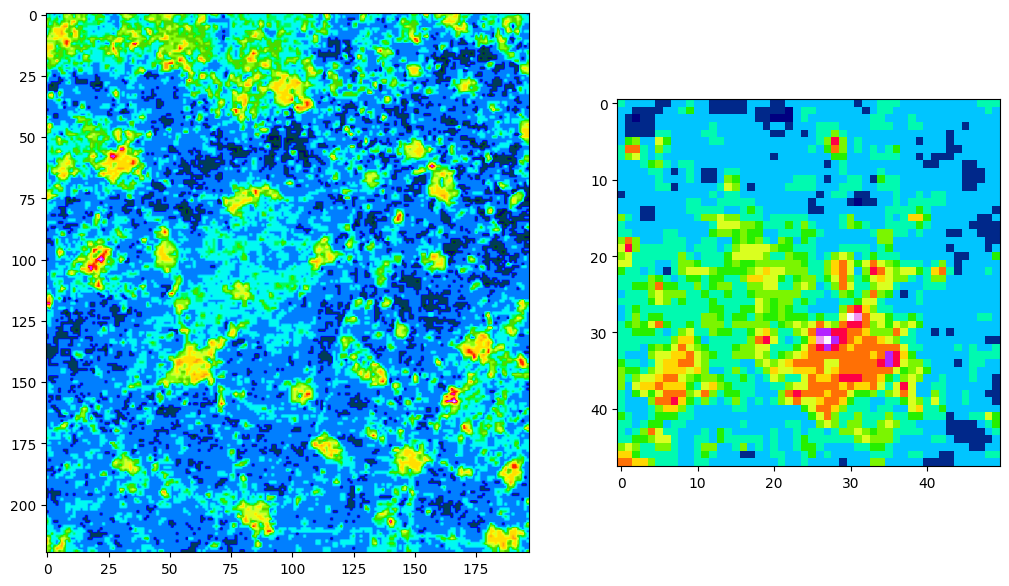

In [76]:
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)
fig.add_subplot(gs[0, :3]), plt.imshow(remote_array[0, 0:, 0:], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(remote_array[0, 27:75, 0:50], cmap='gist_ncar')
plt.show()

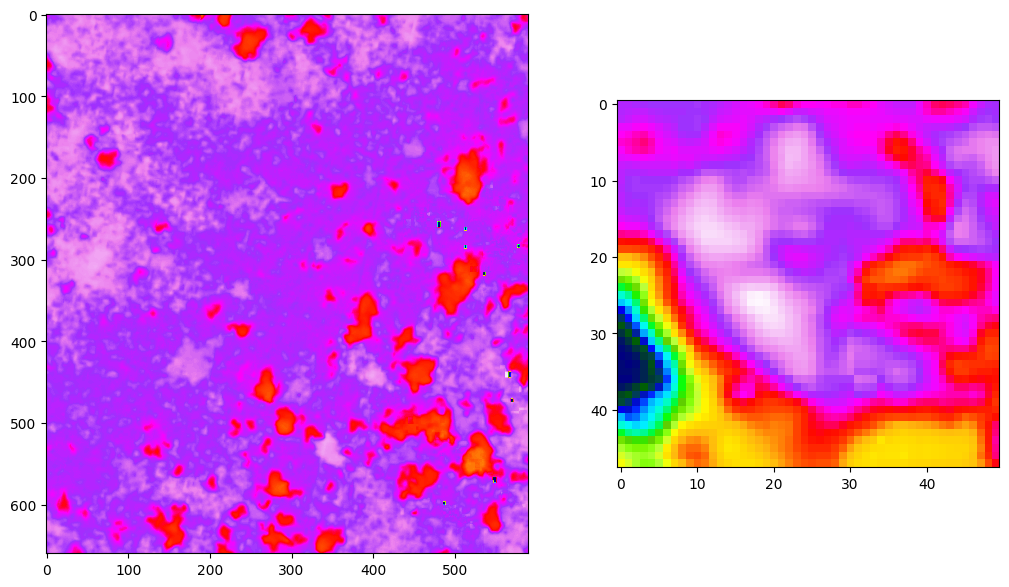

In [78]:
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)
fig.add_subplot(gs[0, :3]), plt.imshow(yona_array[0, 0:, 0:], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(yona_array[0, 27:75, 0:50], cmap='gist_ncar')
plt.show()

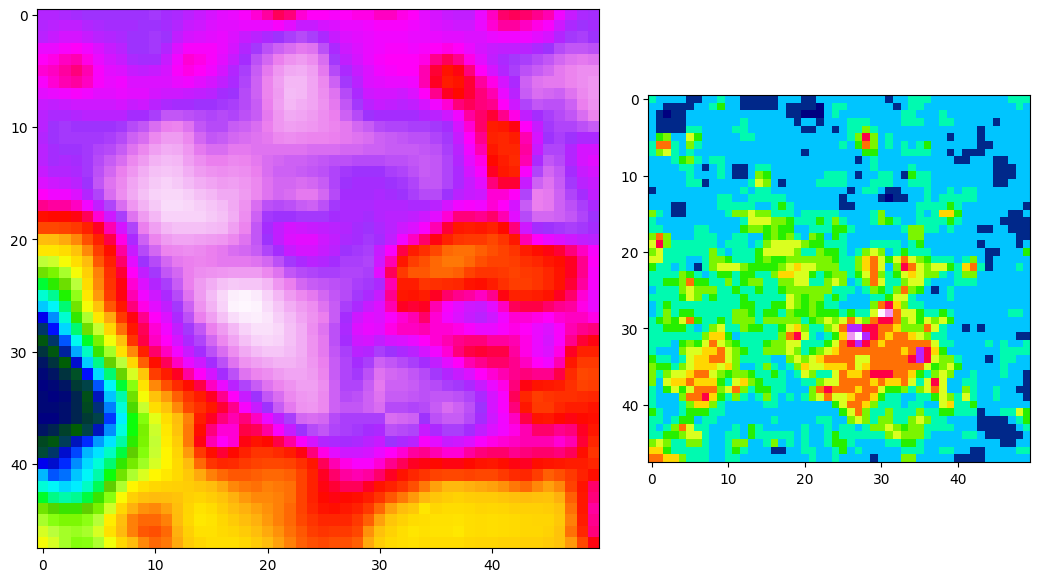

In [80]:
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)

fig.add_subplot(gs[0, :3]), plt.imshow(yona_array[0, 27:75, 0:50], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(remote_array[0, 27:75, 0:50], cmap='gist_ncar')
plt.show()

In [81]:
conc = rio.open('/content/ral.tif')
conc_array = remote.read()

In [82]:
conc_array.shape

(3, 220, 197)

In [84]:
list(np.unique(conc_array))
list(np.unique(conc_array))

[169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202]

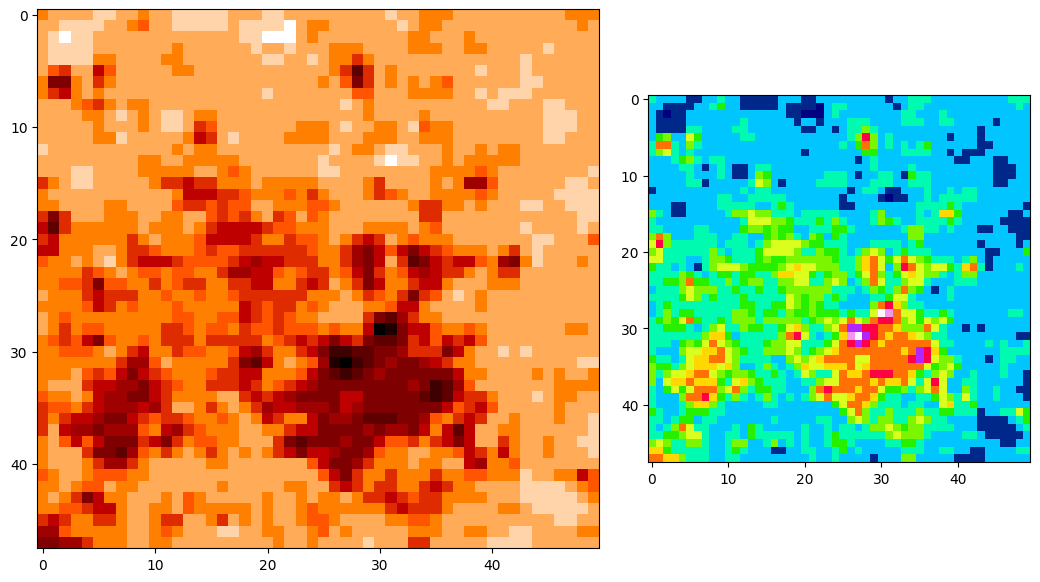

In [87]:
fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)

fig.add_subplot(gs[0, :3]), plt.imshow(conc_array[0, 27:75, 0:50], cmap='gist_heat_r')
fig.add_subplot(gs[0, -2:]), plt.imshow(remote_array[0, 27:75, 0:50], cmap='gist_ncar')
plt.show()

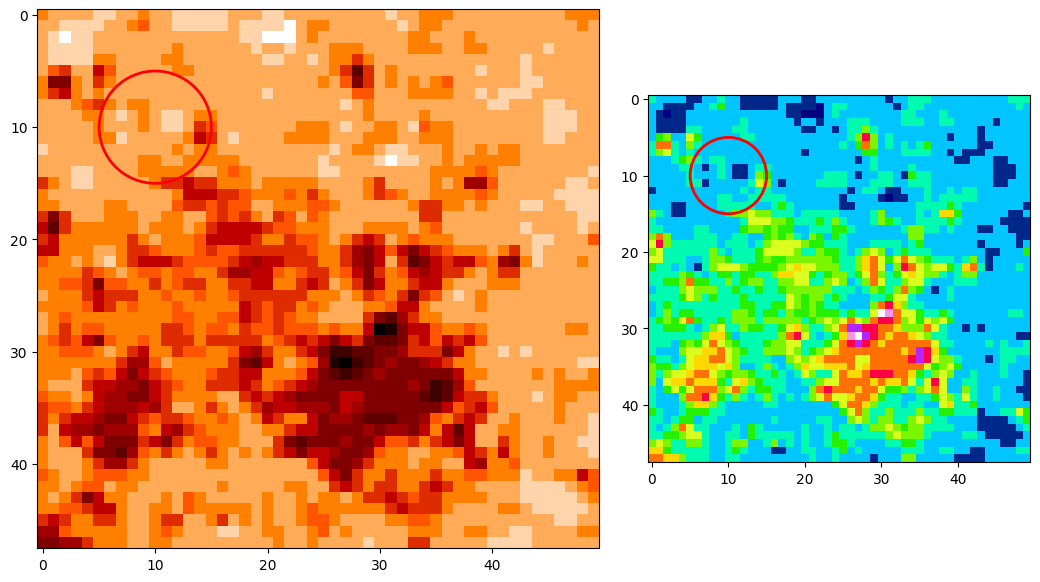

In [115]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define coordinates and radius for Areas of Interest (AOI)
AOI_coords = (10, 10)
AOI_coords1 = (10, 10)
AOI_radius = 5
AOI_radius1 = 5

fig = plt.figure(figsize=(13, 7))

gs = fig.add_gridspec(1, 5)

ax1 = fig.add_subplot(gs[0, :3])
ax1.imshow(conc_array[0, 27:75, 0:50], cmap='gist_heat_r')

# Create a circle patch for the first AOI
circle = patches.Circle(AOI_coords, AOI_radius, edgecolor='red', facecolor='none', linewidth=2)
# Add the circle patch to the first subplot
ax1.add_patch(circle)

ax2 = fig.add_subplot(gs[0, -2:])
ax2.imshow(remote_array[0, 27:75, 0:50], cmap='gist_ncar')

# Create a circle patch for the second AOI
circle1 = patches.Circle(AOI_coords1, AOI_radius1, edgecolor='red', facecolor='none', linewidth=2)
# Add the circle patch to the second subplot
ax2.add_patch(circle1)

# Render and display the plot with all subplots and patches
plt.show()


In [92]:
# Replace all occurrences of the value 255 in 'remote_array' with 0
# This might be used for masking or cleaning up the data
remote_array[remote_array == 255] = 0

# This helps in identifying the distinct classes or values in the data
classes = np.unique(remote_array)

print(classes)


[169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202]


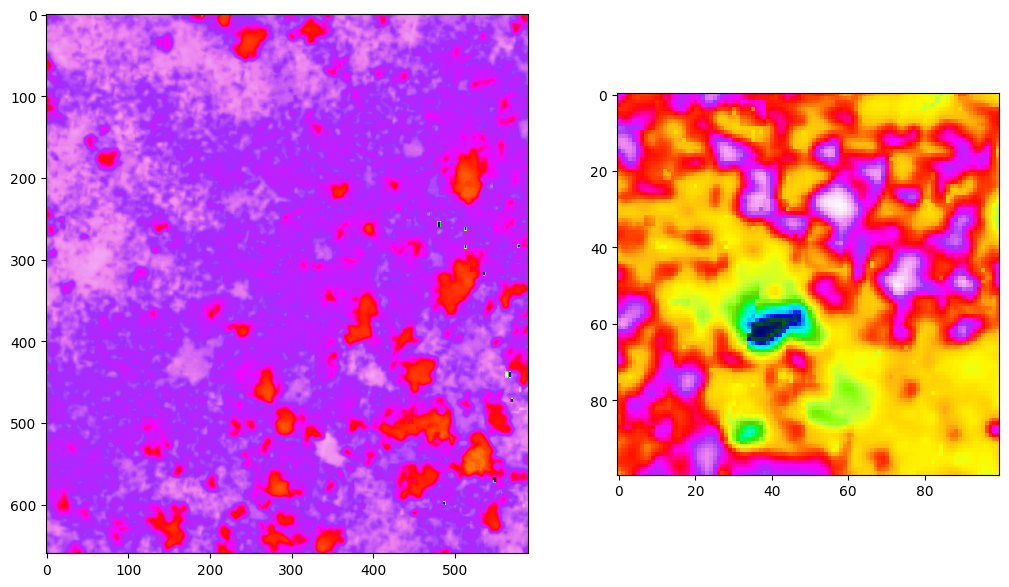

In [96]:

fig = plt.figure(figsize=(13, 7))
gs = fig.add_gridspec(1, 5)
fig.add_subplot(gs[0, :3]), plt.imshow(yona_array[0, :, :], cmap='gist_ncar')
fig.add_subplot(gs[0, -2:]), plt.imshow(yona_array[0, :300, 100:200], cmap='gist_ncar')
plt.show()

In [109]:
list(np.unique(yona_array))
print(np.max(yona_array))
print(np.min(yona_array))
print(np.max(remote_array))
print(np.min(remote_array))

59383
0
202
169


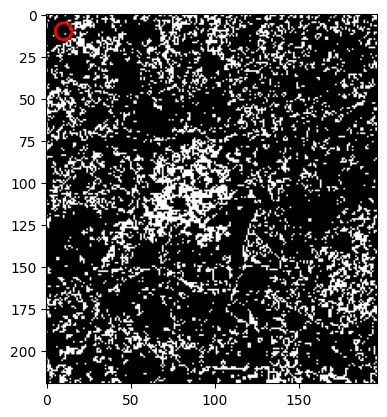

In [129]:
# Define 'c' value for classification
c = 191

# Create an empty array 'cls' with the same dimensions as the remote array
# Initialize with zeros
cls = np.zeros((nRows, nCols), dtype=int)

# Set the elements of 'cls' to 1 where 'remote_array' has the value 'c'
# This creates a binary mask where 'c' is present in the original data
cls[remote_array[0, :, :] == c] = 1

plt.figure()

# Display the binary mask 'cls' as an image
# 'cls' will show areas with value 1 (where 'c' was present) as white and 0 as black
plt.imshow(cls, cmap='gray')

# Define  (AOI)
AOI_coords = (10, 10)
AOI_radius = 5

# Create a circle patch to highlight the AOI
circle = patches.Circle(AOI_coords, AOI_radius, edgecolor='red', facecolor='none', linewidth=2)

# Add the circle patch to the plot
plt.gca().add_patch(circle)

plt.show()
